In [1]:
import numpy as np
import pandas as pd

In [3]:
data=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head(13)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# 数据清理

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


1. 没有空值
2. The total charge 被定义成 object ，但实际上他应该被定义成float.

In [9]:
data.duplicated().sum()

0

In [11]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [13]:
for col in data.columns:
    print(col,data[col].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

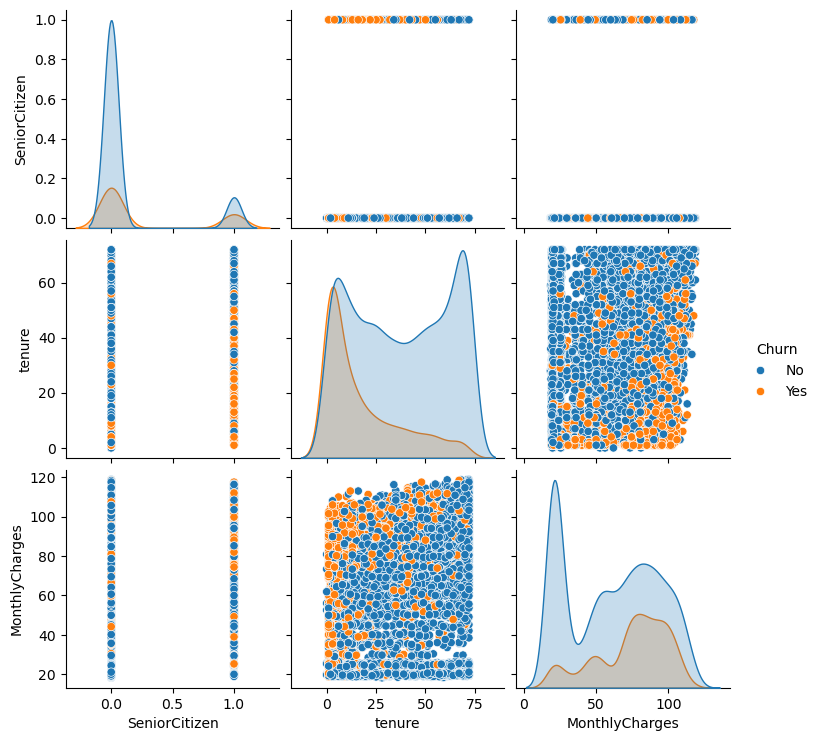

In [16]:
sns.pairplot(data, hue='Churn')

In [19]:
data.drop('customerID', axis =1, inplace = True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
data.TotalCharges.describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [22]:
data[data['TotalCharges']==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [23]:
len(data[data['TotalCharges']==' '])

11

In [24]:
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors = 'coerce')
len(data[data['TotalCharges']==' '])

0

In [31]:
data.iloc[[488,753,936,1082,1340,3331,3826,4380,5218,6670,6754],:]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [33]:
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<Axes: >

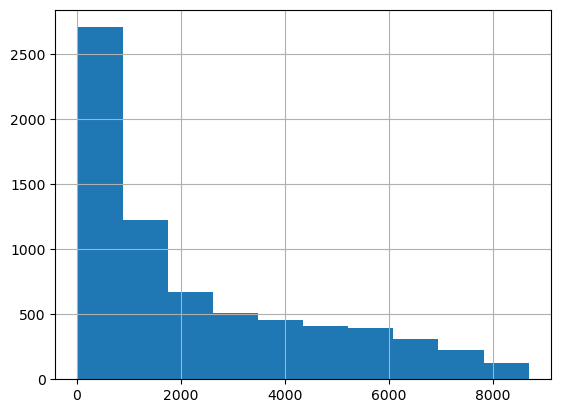

In [35]:
data['TotalCharges'].hist()

In [37]:
data['TotalCharges']=data['TotalCharges'].fillna(data['TotalCharges'].median())

In [39]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

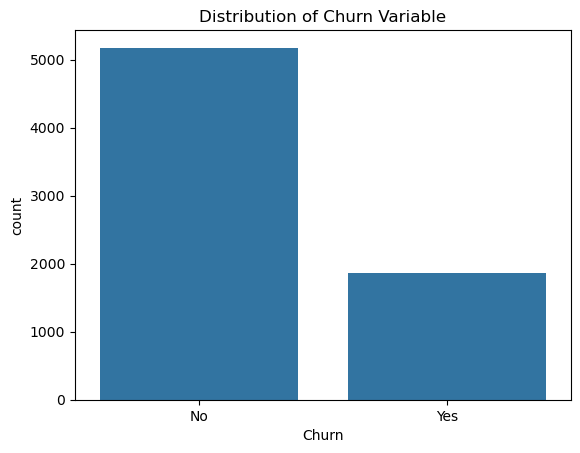

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [41]:
# Plot the distribution of the target variable
sns.countplot(x='Churn', data=data)
plt.title('Distribution of Churn Variable')
plt.show()

# Calculate percentages
churn_counts = data['Churn'].value_counts(normalize=True) * 100
print(churn_counts)

# 用户特征探索性分析
## 4.1 用户纬度特征分析
用户维度特征，即描述用户的特征，包括常用登陆设备、城市等级、性别、年龄、婚姻状况、上月首选订单类型。分析思路如下：

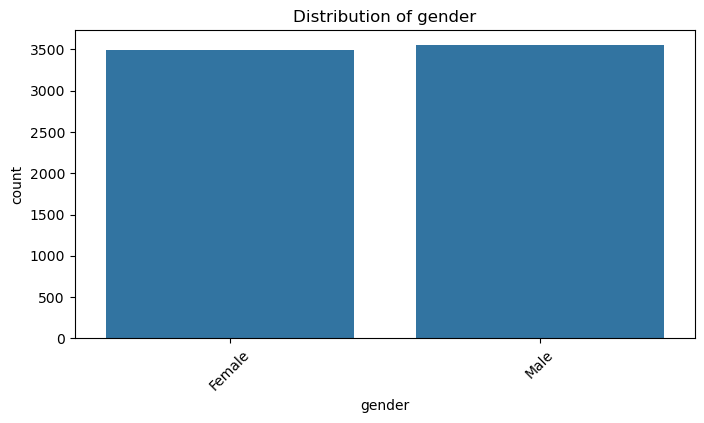

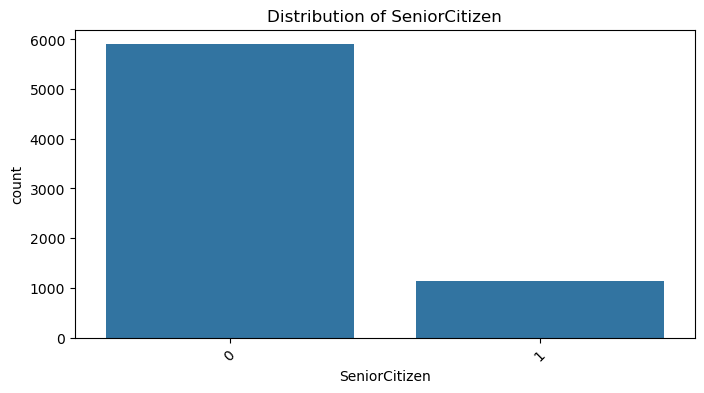

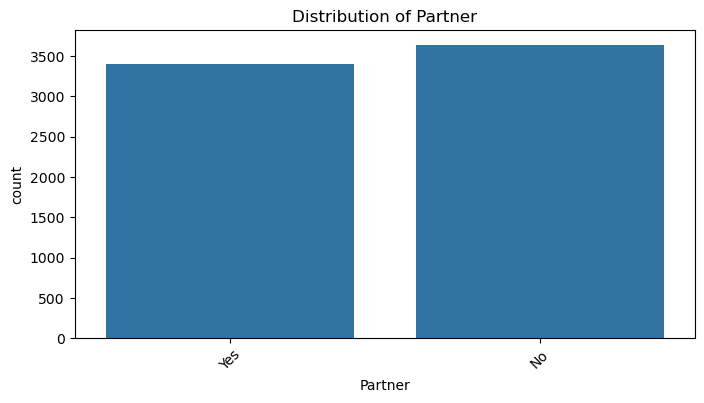

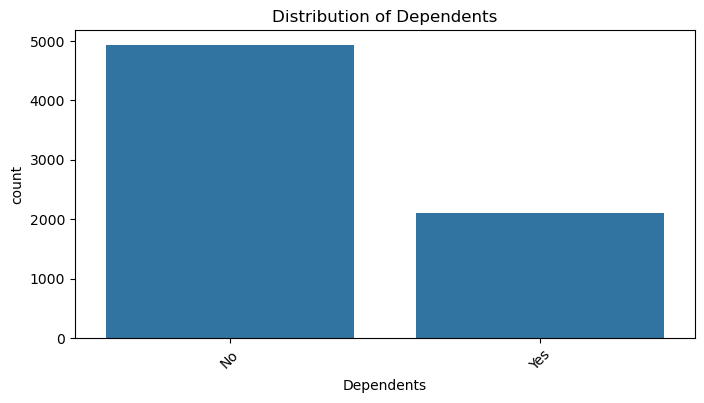

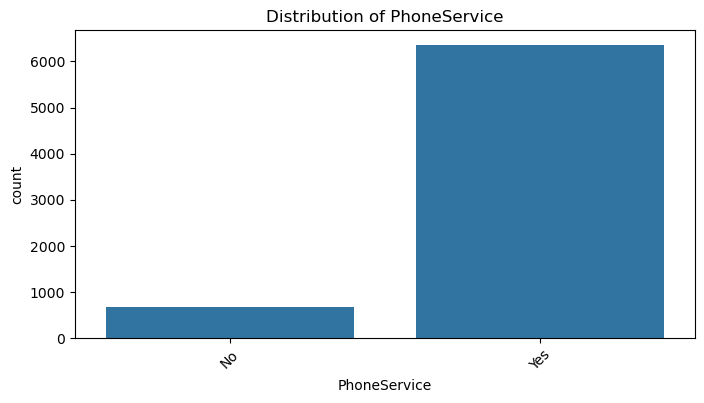

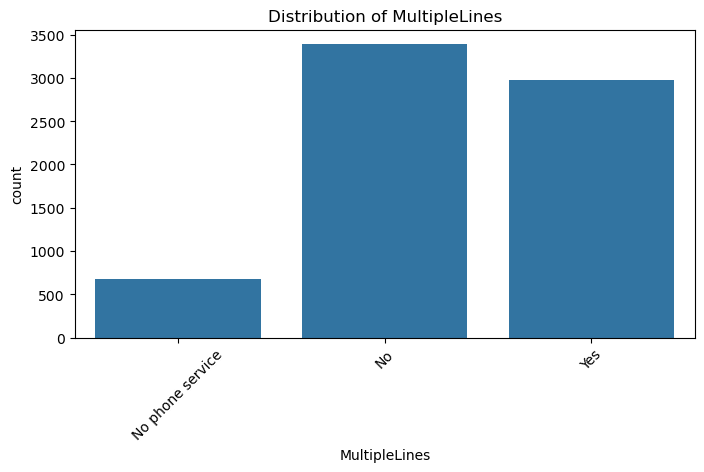

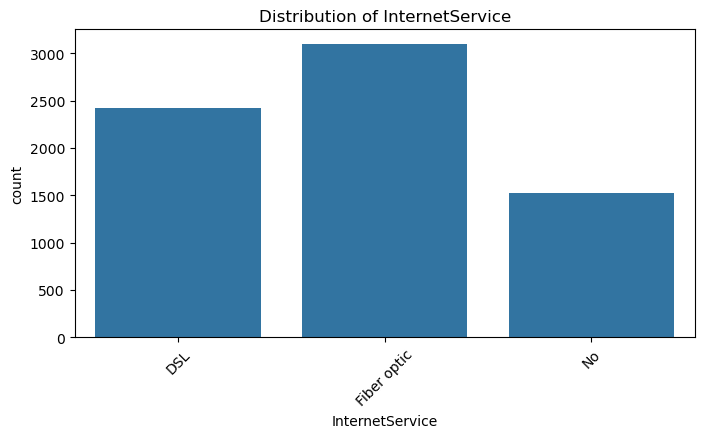

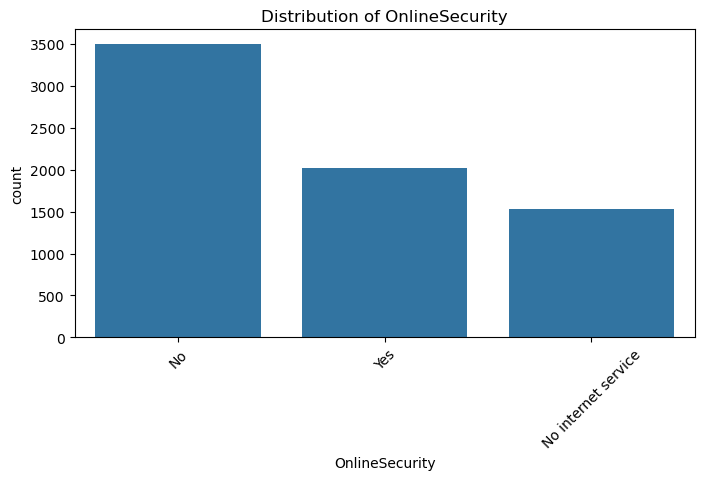

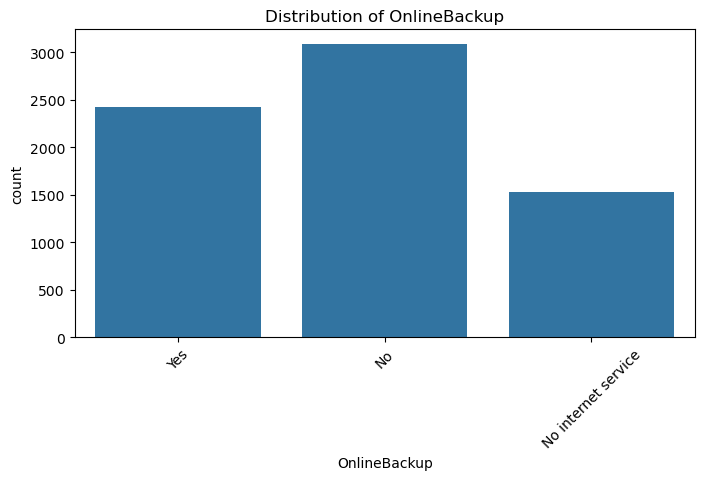

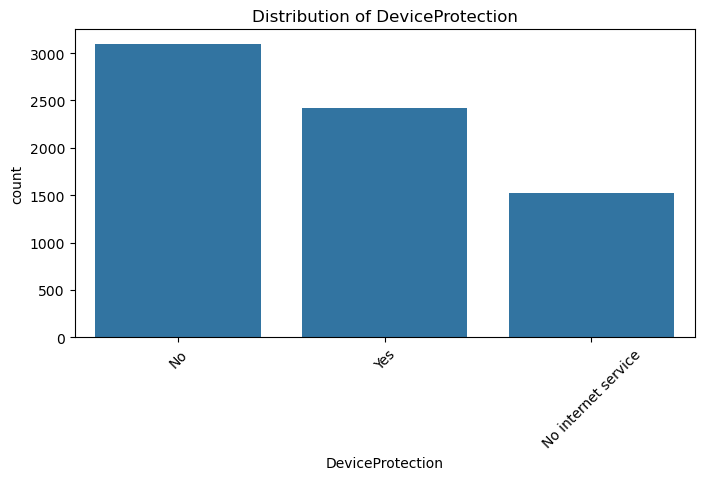

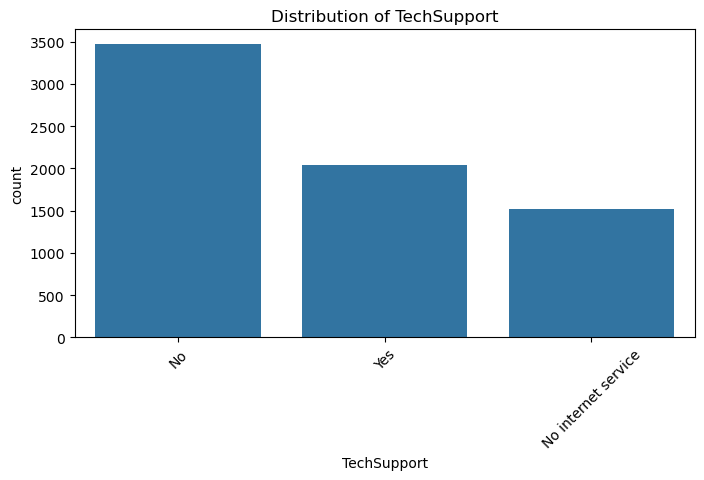

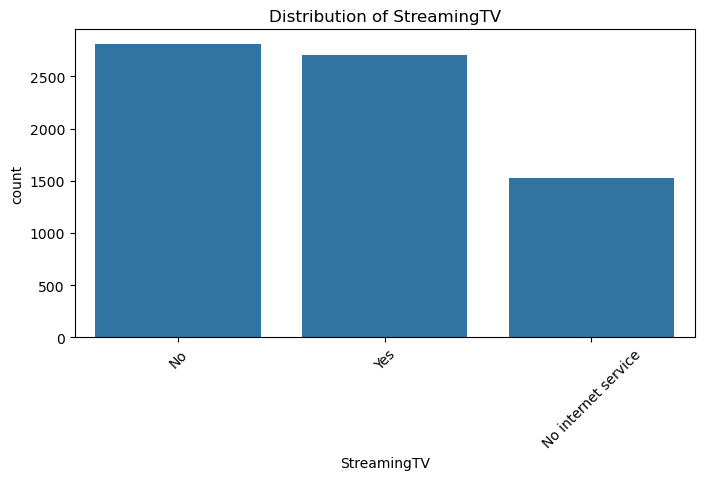

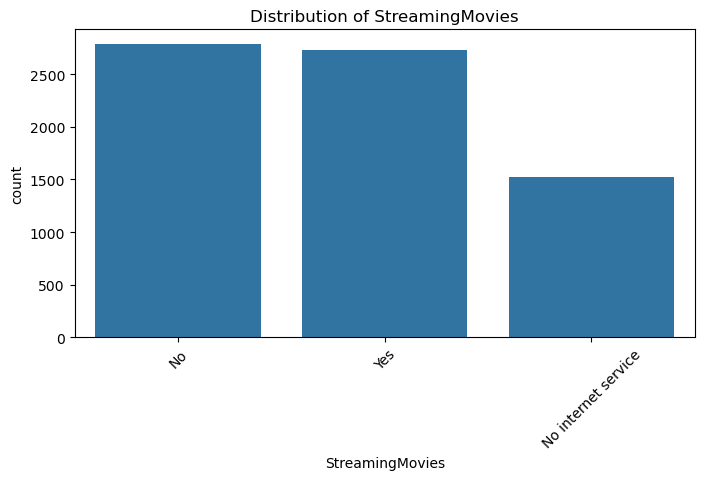

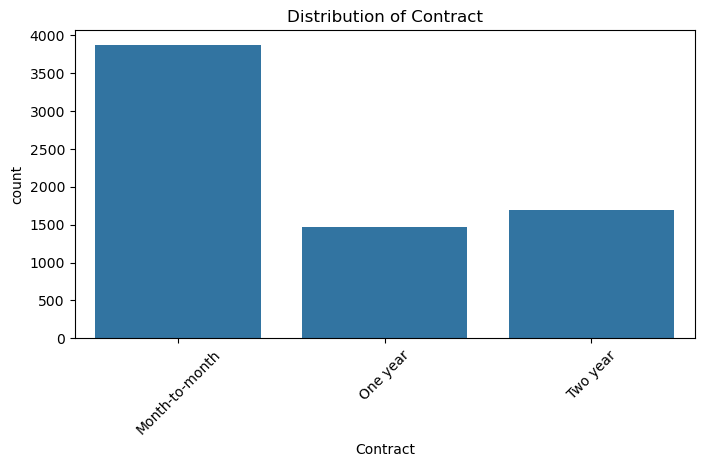

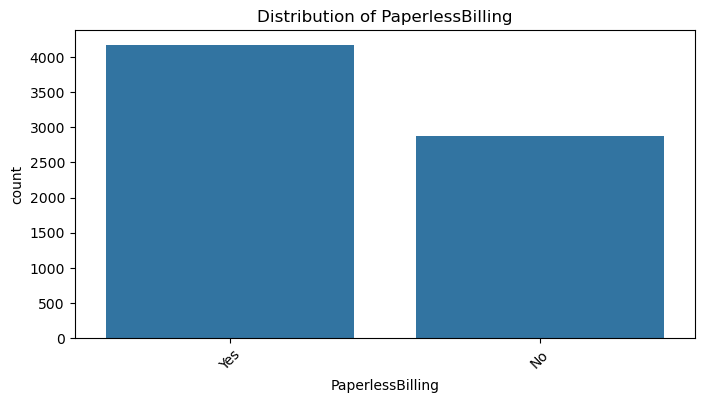

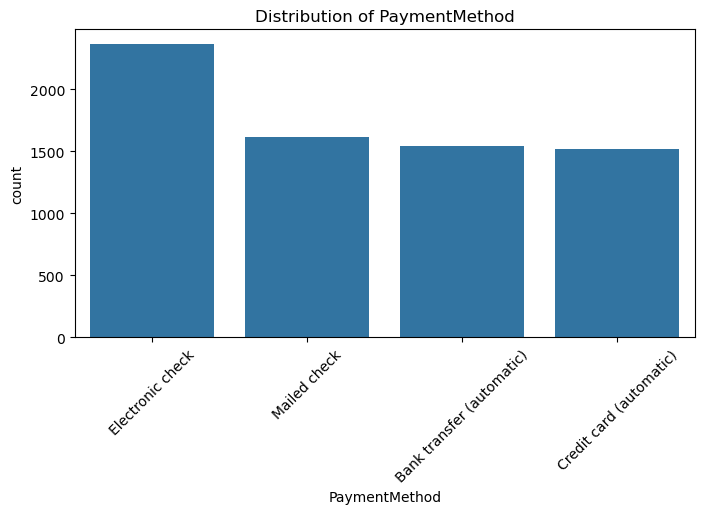

In [44]:
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                        'PhoneService', 'MultipleLines', 'InternetService',
                        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies',
                        'Contract', 'PaperlessBilling', 'PaymentMethod']

for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, data=data)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.show()

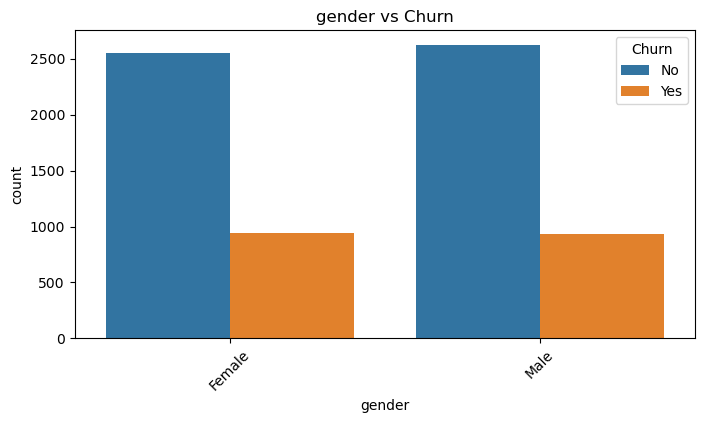

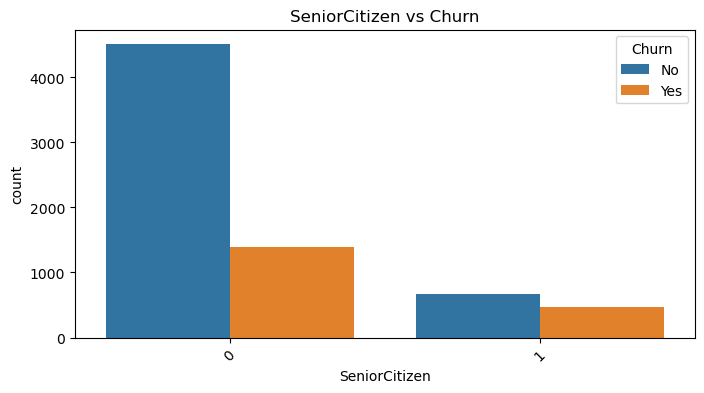

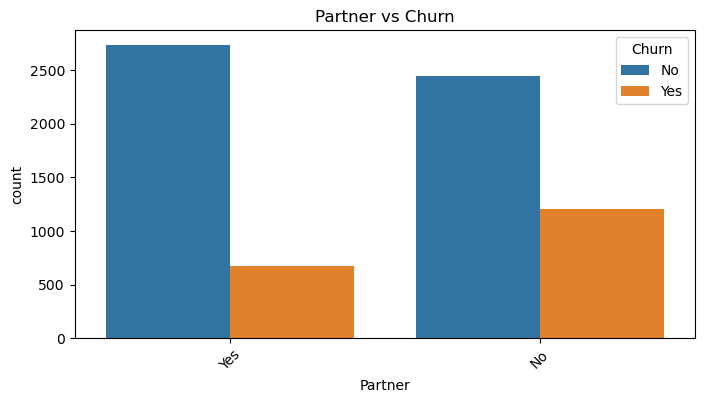

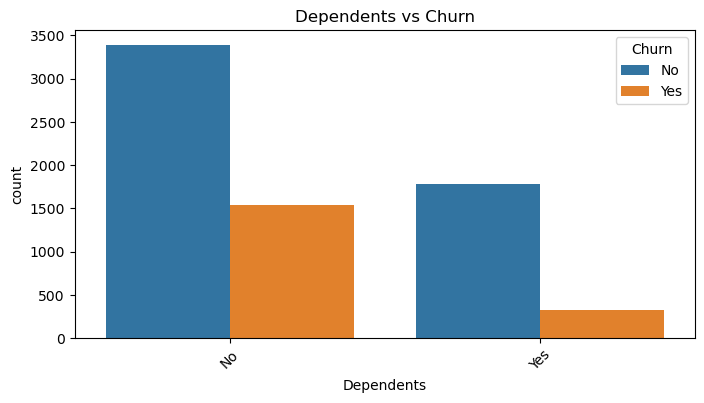

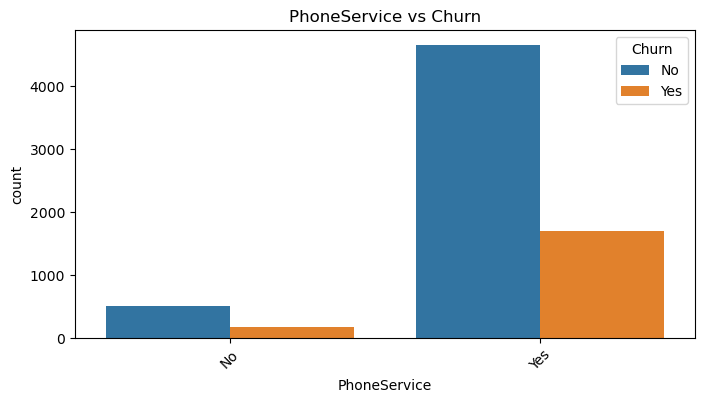

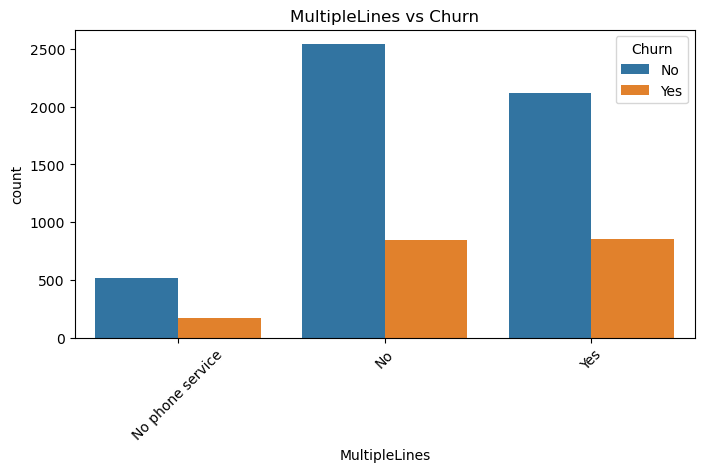

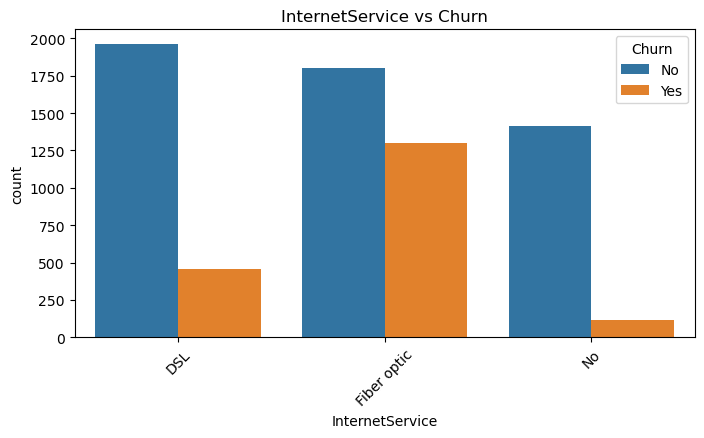

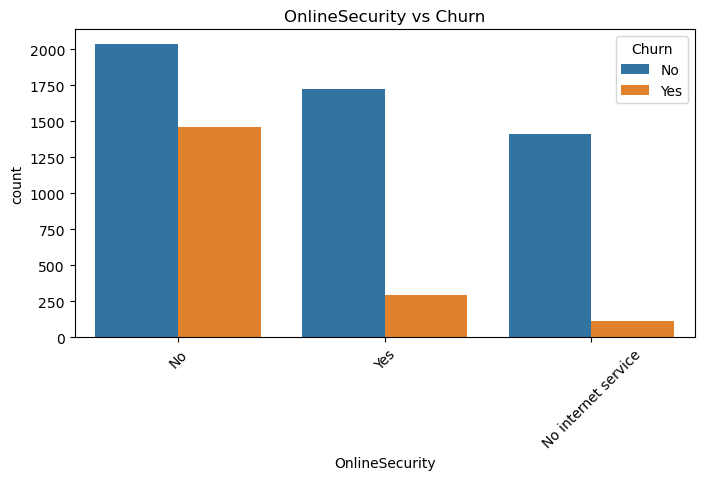

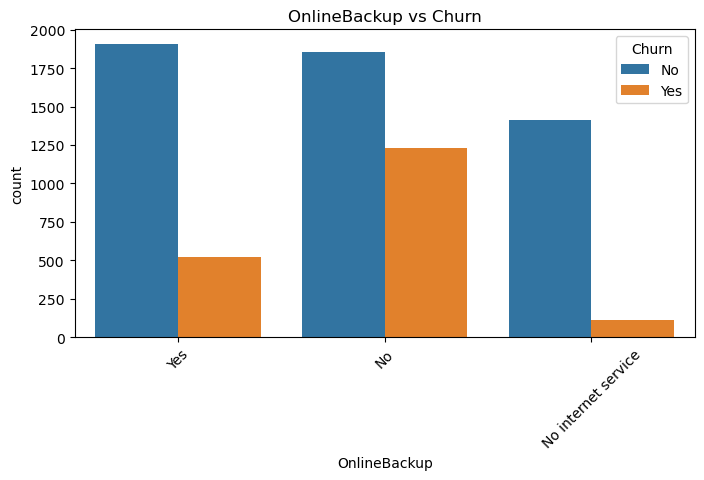

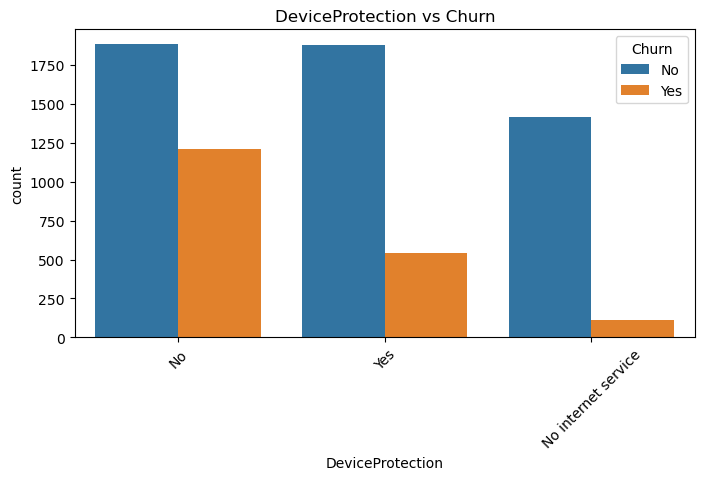

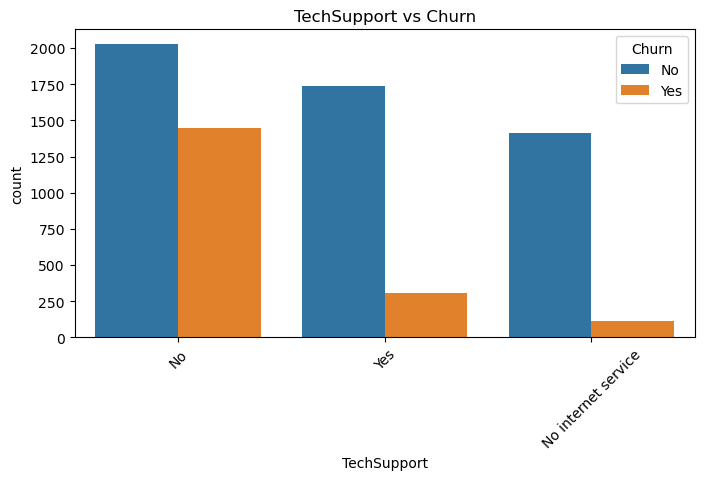

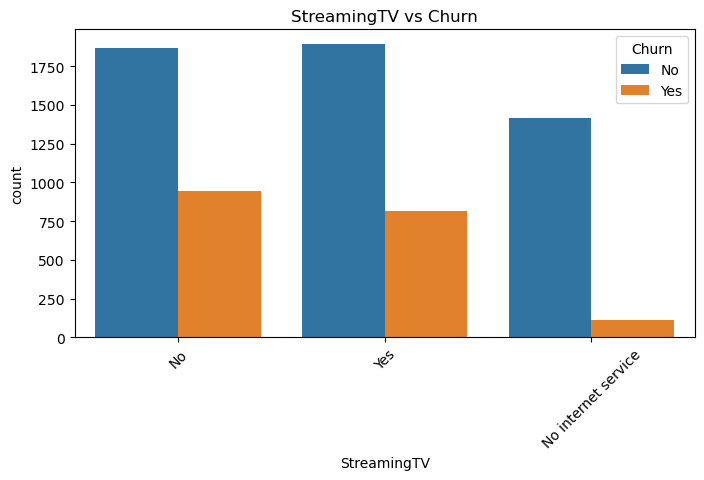

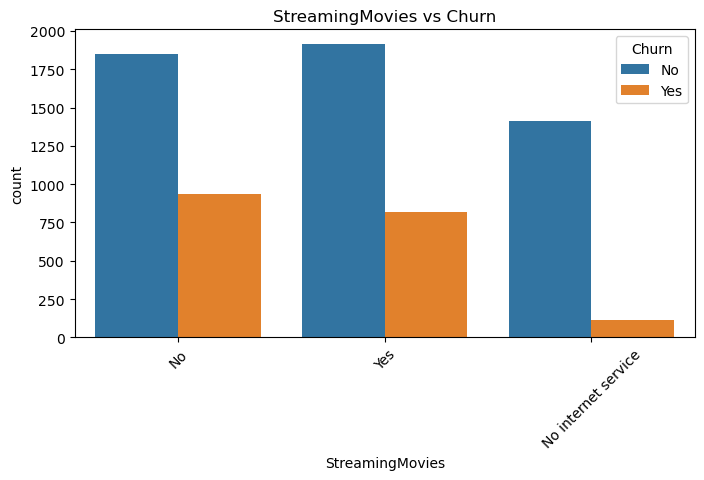

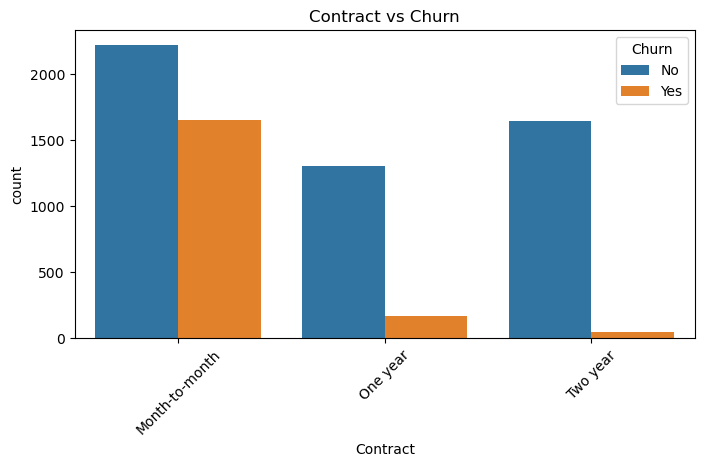

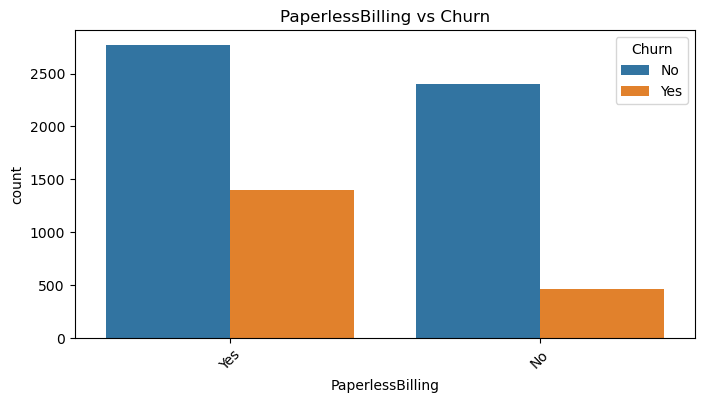

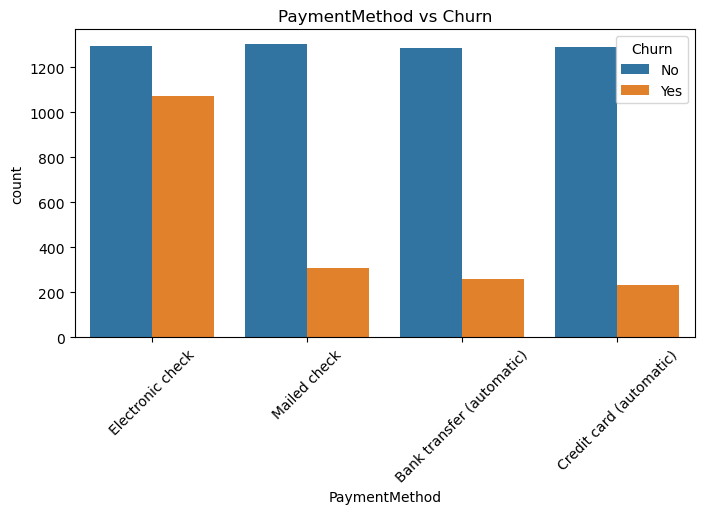

In [46]:
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, hue='Churn', data=data)
    plt.title(f'{feature} vs Churn')
    plt.xticks(rotation=45)
    plt.show()

1. 男性用户和女性用户的比例，以及男性流失用户和女性流失用户的占比基本持平，建议根据男性和女性喜欢的套餐，进行套餐的定向推荐，减少其流失率。
2. 老年人比例远低于非老年人比例，但是老年人的流失率远高于年轻人的流失率。
3. 没有对象的人的流失率高于有对象的人的流失率。
4. Telco用户中没有经济独立的用户多于经济独立的人，且此类用户远比经济独立的用户更加容易流失。
5. 使用电话的用户远高于非电话使用用户，且电话使用用户的流失率也远高于非电话流失率。
6. 有多条电话线的用户更容易流失
7. 使用Fiber optic的用户更容易流失
8. 没有使用Online Security的用户更容易流失，因此我们需要推广Online security.
9. 同样的，不实用Online Back up的用户更容易流失，因此我们也需要推广Online Security的套餐。
10. 不使用Device Protection/ TechSupport的更容易流失。
11. 没使用流媒电视/流媒电影的和使用流媒电视的用户都挺容易流失的，但没使用流媒的更容易流失，因此，我们在推广流媒的同时，需要提升流媒的质量。
12. 月套餐的更容易流失，加大优惠推广年套餐。
13. 使用paperless支付方式的更容易流失，提升paperless的支付效率。
14. electronic check的支付方式更容易流失，提升electronic check的支付效率。

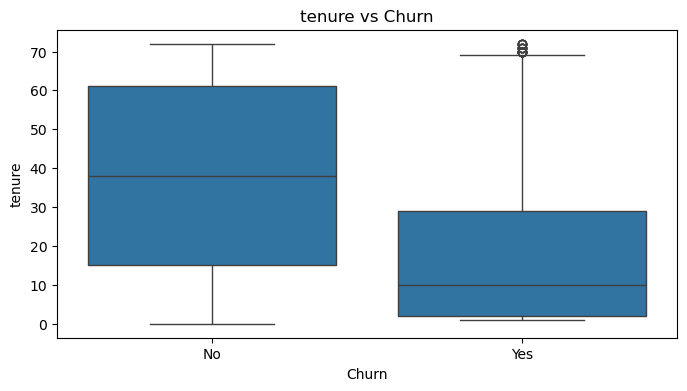

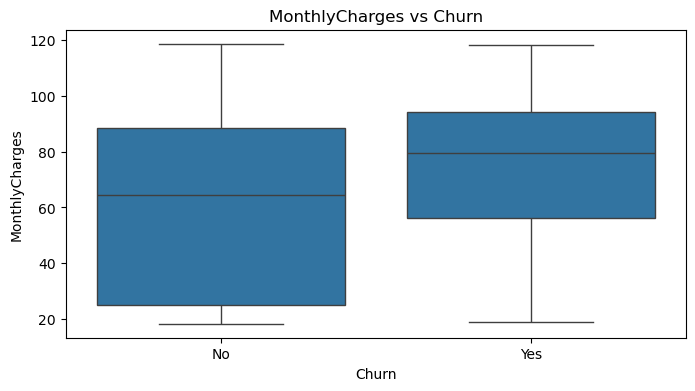

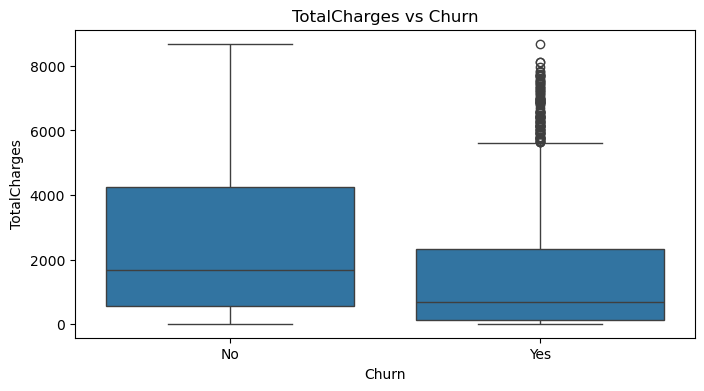

In [49]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Churn', y=feature, data=data)
    plt.title(f'{feature} vs Churn')
    plt.show()

不流失的用户有更长的tenure；流失的用户monthly charges更高；但是非流失用户需要付更高的总费用。

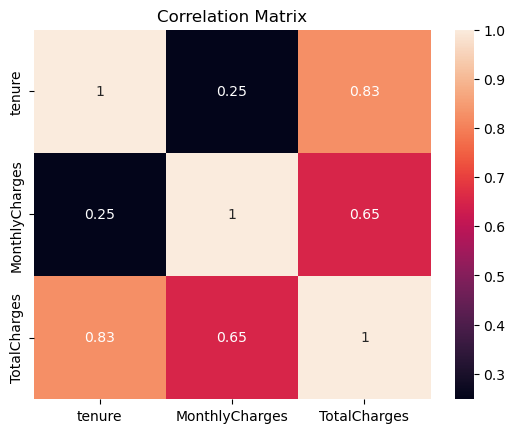

In [55]:
# Compute correlation matrix
corr_matrix = data[numerical_features].corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

total charges和tenure高度相关。

## 转换：
转换成0/1: SeniorCitizen(已变), Partner, dependents, PhoneService
one-hot coding: gender, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod

In [59]:
data['Partner'] = data['Partner'].map({'Yes': 1, 'No': 0})
data['Dependents'] = data['Dependents'].map({'Yes': 1, 'No': 0})
data['PhoneService'] = data['PhoneService'].map({'Yes': 1, 'No': 0})

In [61]:
df = pd.get_dummies(data, columns=['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'])

In [63]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,29.85,29.85,No,True,False,...,False,True,False,False,False,True,False,False,True,False
1,0,0,0,34,1,56.95,1889.50,No,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,0,0,2,1,53.85,108.15,Yes,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,0,0,45,0,42.30,1840.75,No,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,0,0,2,1,70.70,151.65,Yes,True,False,...,False,True,False,False,False,True,False,False,True,False


In [65]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [67]:
df

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,29.85,29.85,0,True,False,...,False,True,False,False,False,True,False,False,True,False
1,0,0,0,34,1,56.95,1889.50,0,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,0,0,2,1,53.85,108.15,1,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,0,0,45,0,42.30,1840.75,0,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,0,0,2,1,70.70,151.65,1,True,False,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,84.80,1990.50,0,False,True,...,True,False,True,False,False,True,False,False,False,True
7039,0,1,1,72,1,103.20,7362.90,0,True,False,...,True,False,True,False,False,True,False,True,False,False
7040,0,1,1,11,0,29.60,346.45,0,True,False,...,False,True,False,False,False,True,False,False,True,False
7041,1,1,0,4,1,74.40,306.60,1,False,True,...,False,True,False,False,False,True,False,False,False,True


In [69]:
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Female',
       'gender_Male', 'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'Paymen

In [71]:
boolean_columns = ['gender_Female','gender_Male', 'MultipleLines_No', 'MultipleLines_No phone service',
                   'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']



In [73]:
df[boolean_columns] = df[boolean_columns].astype(int)
df

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,29.85,29.85,0,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,0,0,34,1,56.95,1889.50,0,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,0,0,2,1,53.85,108.15,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,0,0,45,0,42.30,1840.75,0,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,0,0,2,1,70.70,151.65,1,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,84.80,1990.50,0,0,1,...,1,0,1,0,0,1,0,0,0,1
7039,0,1,1,72,1,103.20,7362.90,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7040,0,1,1,11,0,29.60,346.45,0,1,0,...,0,1,0,0,0,1,0,0,1,0
7041,1,1,0,4,1,74.40,306.60,1,0,1,...,0,1,0,0,0,1,0,0,0,1


用户流失标签的相关系数绝对值越大，与用户流失相关程度越高；>0.7为强相关，<0.3为弱相关，相关系数为正，与用户流失为正相关，否则，为负相关。

In [75]:
correlations = df.corrwith(df['Churn'])
print(correlations)

SeniorCitizen                              0.150889
Partner                                   -0.150448
Dependents                                -0.164221
tenure                                    -0.352229
PhoneService                               0.011942
MonthlyCharges                             0.193356
TotalCharges                              -0.199037
Churn                                      1.000000
gender_Female                              0.008612
gender_Male                               -0.008612
MultipleLines_No                          -0.032569
MultipleLines_No phone service            -0.011942
MultipleLines_Yes                          0.040102
InternetService_DSL                       -0.124214
InternetService_Fiber optic                0.308020
InternetService_No                        -0.227890
OnlineSecurity_No                          0.342637
OnlineSecurity_No internet service        -0.227890
OnlineSecurity_Yes                        -0.171226
OnlineBackup

1. 使用平台时间_月相关系数为-0.35，因此，使用平台时间越短，用户越有可能流失
2. 使用InternetService_Fiber optic 的相关系数为0.308020，使用Fiber optic更容易导致用户流失。
3. 不使用TechSupport的相关系数为 0.337281，不使用TechSupport的更容易导致用户流失。
4. Contract_Month-to-month的相关系数为0.405103，但Contract_Two year的相关系数为-0.302253，因此Month-to-month的contract更容易导致流失，反之两年的contract更不容易导致流失。
5. PaymentMethod_Electronic check相关系数时0.301919，因此Electronic check更容易导致流失。

# 建模评估

In [78]:
from imblearn.over_sampling import SMOTE
X = df.drop('Churn' , axis=1)
y = df['Churn']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                    test_size=0.2, random_state=42)

In [113]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
RF_c = RandomForestClassifier()

# Train the model
RF_c.fit(X_train, y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1021
           1       0.88      0.84      0.86      1049

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



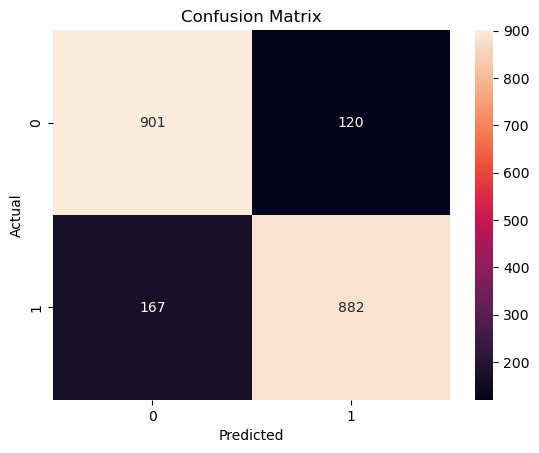

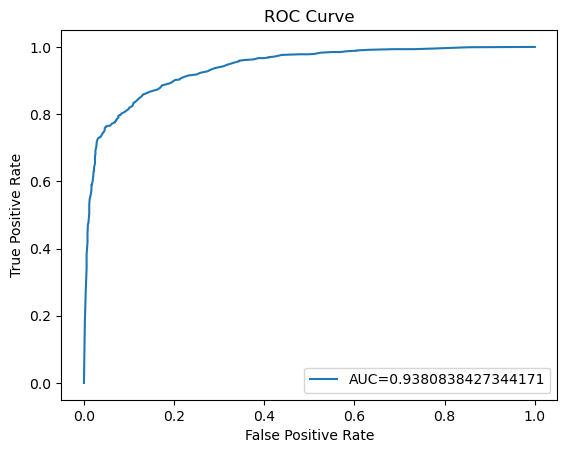

In [115]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Make predictions
y_pred = RF_c.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
# ROC-AUC Score
y_pred_proba = RF_c.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='roc_auc', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}


In [119]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))

y_pred_proba = best_model.predict_proba(X_test)[::,1]
auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", auc)


              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1021
           1       0.88      0.85      0.86      1049

    accuracy                           0.87      2070
   macro avg       0.87      0.87      0.87      2070
weighted avg       0.87      0.87      0.87      2070

ROC-AUC Score: 0.9405277541504479


In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1021
           1       0.81      0.84      0.82      1049

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070



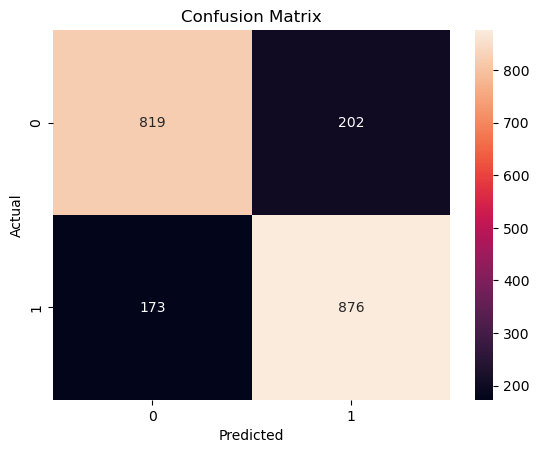

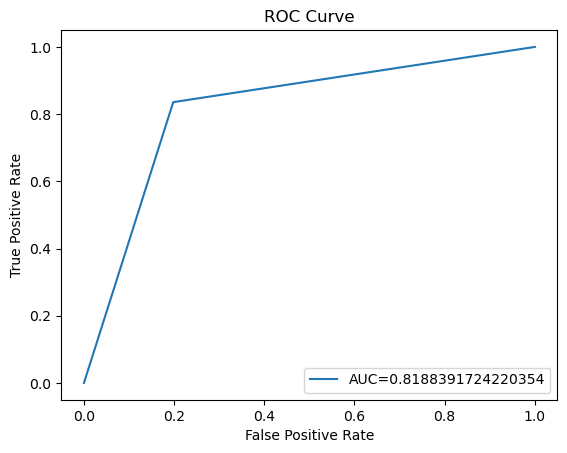

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# 创建决策树分类器
DT_c = DecisionTreeClassifier(random_state=42)

# 训练模型
DT_c.fit(X_train, y_train)

# 进行预测
y_pred = DT_c.predict(X_test)

# 分类报告
print(classification_report(y_test, y_pred))

# 混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC-AUC 分数
y_pred_proba = DT_c.predict_proba(X_test)[:, 1]  # 获取正类的概率
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label="AUC=" + str(auc))
plt.legend(loc=4)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [94]:
dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [None, 10, 20], 
    'min_samples_split': [2, 5],  
    'min_samples_leaf': [1, 2]   
}


grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,
                           cv=5, scoring='roc_auc', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [96]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))

y_pred_proba = best_model.predict_proba(X_test)[::,1]
auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", auc)

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1021
           1       0.82      0.85      0.84      1049

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070

ROC-AUC Score: 0.8894600426318988


              precision    recall  f1-score   support

           0       0.85      0.71      0.78      1021
           1       0.76      0.88      0.82      1049

    accuracy                           0.80      2070
   macro avg       0.81      0.80      0.80      2070
weighted avg       0.81      0.80      0.80      2070



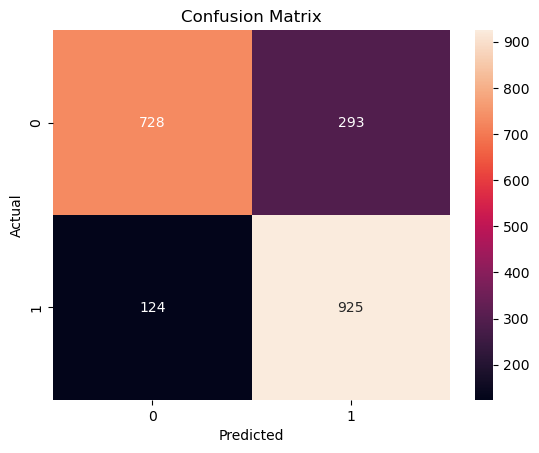

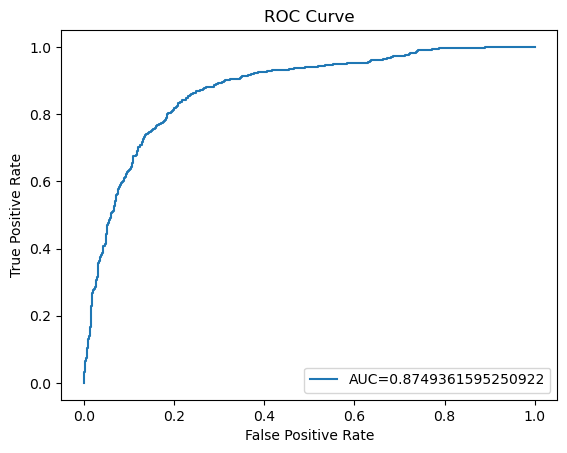

In [98]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

GNB_c = GaussianNB()

GNB_c.fit(X_train, y_train)

y_pred = GNB_c.predict(X_test)

print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

y_pred_proba = GNB_c.predict_proba(X_test)[:, 1] 
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label="AUC=" + str(auc))
plt.legend(loc=4)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [100]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

gnb = GaussianNB()

param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid,
                           cv=5, scoring='roc_auc', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'var_smoothing': 1e-09}


              precision    recall  f1-score   support

           0       0.81      0.71      0.76      1021
           1       0.75      0.84      0.79      1049

    accuracy                           0.78      2070
   macro avg       0.78      0.78      0.78      2070
weighted avg       0.78      0.78      0.78      2070



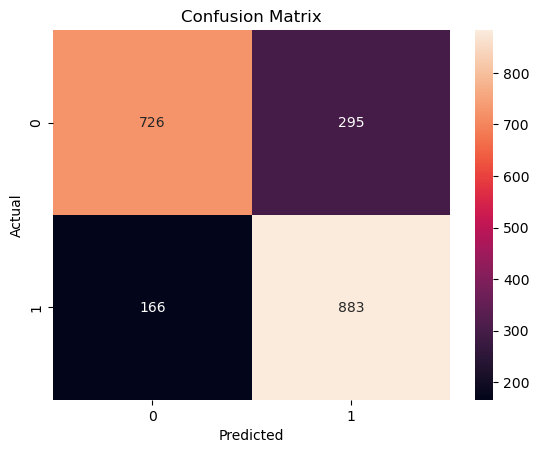

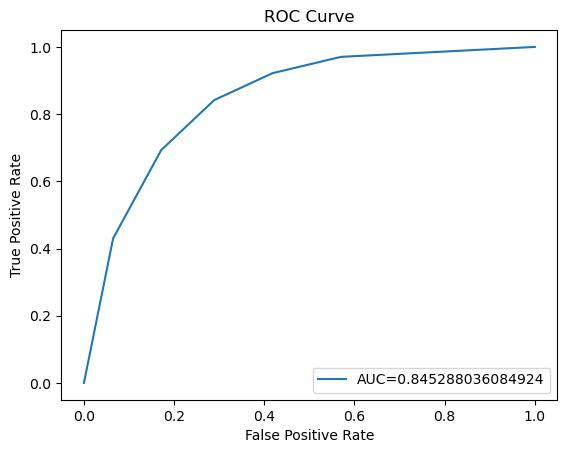

In [102]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

KNN_c = KNeighborsClassifier(n_neighbors=5) 

KNN_c.fit(X_train, y_train)

y_pred = KNN_c.predict(X_test)

print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

y_pred_proba = KNN_c.predict_proba(X_test)[:, 1] 
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label="AUC=" + str(auc))
plt.legend(loc=4)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Best parameters found:  {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.88      0.71      0.79      1021
           1       0.76      0.90      0.83      1049

    accuracy                           0.81      2070
   macro avg       0.82      0.81      0.81      2070
weighted avg       0.82      0.81      0.81      2070



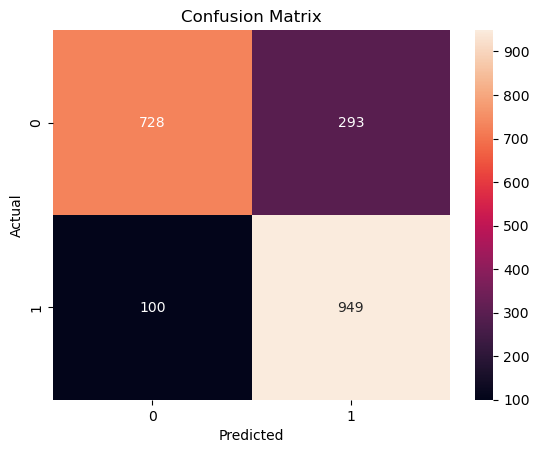

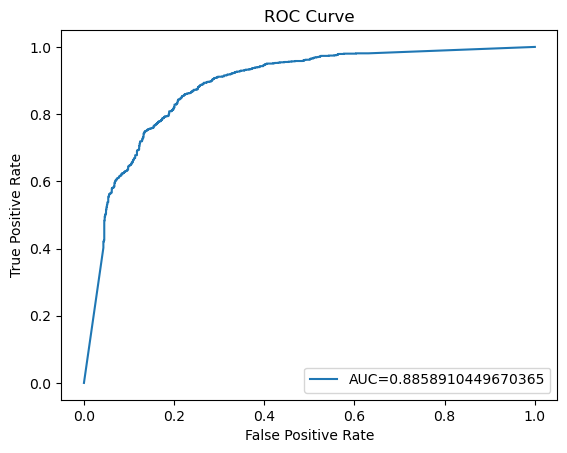

In [104]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9],  
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan'] 
}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid,
                           cv=5, scoring='roc_auc', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

y_pred_proba = best_knn.predict_proba(X_test)[:, 1]  # 获取正类的概率
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label="AUC=" + str(auc))
plt.legend(loc=4)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

              precision    recall  f1-score   support

           0       0.65      0.71      0.68      1021
           1       0.69      0.62      0.65      1049

    accuracy                           0.67      2070
   macro avg       0.67      0.67      0.67      2070
weighted avg       0.67      0.67      0.67      2070



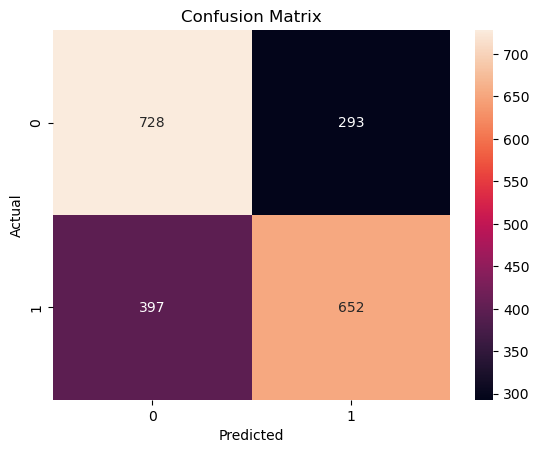

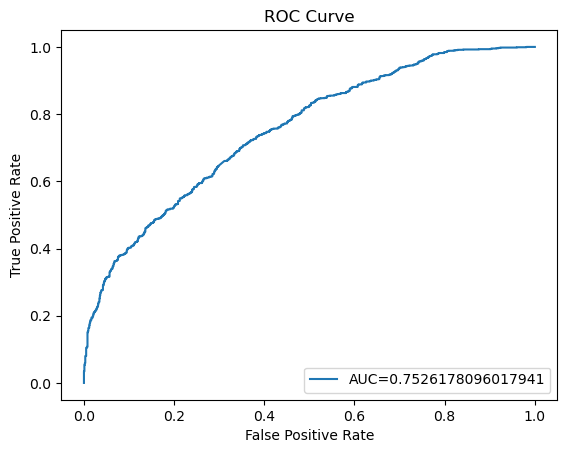

In [105]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

SVC_c = SVC(probability=True, random_state=42) 

SVC_c.fit(X_train, y_train)

y_pred = SVC_c.predict(X_test)

print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

y_pred_proba = SVC_c.predict_proba(X_test)[:, 1] 
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label="AUC=" + str(auc))
plt.legend(loc=4)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

random forest的ROC最高
## 模型优化
模型优化是个枯燥且需要耐心的过程，主要是寻找最优的模型参数，使得模型的准确度最高。这里用最常用且简便的GridSearch网格搜索寻找模型的最优参数。
GridSearch网格搜索是一种穷举搜索的参数调优手段，通过遍历所有的候选参数，循环建立模型并评估模型的有效性和准确性，选取最好的参数作为最终结果。
（1）模型优化步骤如下
选择学习效果最好的模型，通过GridSearch网格搜索，找到其最优的模型参数。
使用最优的模型参数，建立LightGBM机器学习模型，计算器ROC得分，并输出最优模型参数下的特征及特征重要度。
（2）对优化后的模型结果进行分析如下：
参数调优后的算法ROC得分比调优前的高

根据参数调优的LightGBM模型，对用户流失影响最大的用户特征依次为：

In [129]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
feature_importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

top_5_features = feature_importance_df.head(5)

print("Top 5 features influencing the experimental results:")
print(top_5_features)

Top 5 features influencing the experimental results:
                    Feature  Importance
3                    tenure    0.098740
6              TotalCharges    0.097447
5            MonthlyCharges    0.075909
35        Contract_Two year    0.062800
33  Contract_Month-to-month    0.056787


根据模型，我们可以得出，对用户流失影响最大的用户特征依次为：tenure，total charges， MonthlyCharges，Contract_Two year和Contract_Month-to-monthw